In [39]:
import pandas as pd
import numpy as np
# import numpy as nps

In [40]:
%matplotlib inline

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go

pyo.init_notebook_mode(connected=True)

import cufflinks as cf

# import plotly.tools as tls
# tls.embed('https://plot.ly/~cufflinks/8')

In [42]:
df = pd.read_excel('Daten/Wohnungen/Leerwohnungen-Stadt-Zuerich.xlsx',
                   header=7).fillna(0)

In [43]:
df.head()

,Leerwohnungsbestand 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Leerwohnungsziffer3,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Leerwohnungsbestand,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
NaN,Total,davon mit ... Zimmer(n),0.0,0.0,0.0,0,davon in …,0,2018.00,2017.00,...,2011.000000,2010.000,2017.0,2016.0,2015.0,2014.0,2013.0,2012,2011.0,2010.0
NaN,0,1,2.0,3.0,4.0,5 u.,EFH 1,Neu-,0.00,0.00,...,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
NaN,0,0,0.0,0.0,0.0,mehr,0,bauten 2,0.00,0.00,...,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
Stadt Zürich,447,32,95.0,173.0,107.0,40,7,87,0.20,0.21,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206,125.0,136.0
Kreis 1,25,4,6.0,5.0,7.0,3,0,0,0.65,0.42,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10,3.0,2.0


-------

Daten säubern – Rows für Header verbinden

In [44]:
df = pd.read_excel('Daten/Wohnungen/Leerwohnungen-Stadt-Zuerich.xlsx', header=7).replace('–', np.nan)
df.head()

,Leerwohnungsbestand 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Leerwohnungsziffer3,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Leerwohnungsbestand,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
NaN,Total,davon mit ... Zimmer(n),NaN,NaN,NaN,NaN,davon in …,NaN,2018.00,2017.00,...,2011.000000,2010.000,2017.0,2016.0,2015.0,2014.0,2013.0,2012.0,2011.0,2010.0
NaN,NaN,1,2.0,3.0,4.0,5 u.,EFH 1,Neu-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,mehr,NaN,bauten 2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stadt Zürich,447,32,95.0,173.0,107.0,40,7,87,0.20,0.21,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
Kreis 1,25,4,6.0,5.0,7.0,3,0,0,0.65,0.42,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0


In [45]:
list1=list(df)

In [46]:
df = pd.read_excel('Daten/Wohnungen/Leerwohnungen-Stadt-Zuerich.xlsx', header=8).replace('–', np.nan)
df.head()

,Total,davon mit ... Zimmer(n),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,davon in …,Unnamed: 7,2018,2017,...,2011,2010,2017.1,2016.1,2015.1,2014.1,2013.1,2012.1,2011.1,2010.1
NaN,NaN,1.0,2.0,3.0,4.0,5 u.,EFH 1,Neu-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,mehr,NaN,bauten 2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stadt Zürich,447.0,32.0,95.0,173.0,107.0,40,7,87,0.20,0.21,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
Kreis 1,25.0,4.0,6.0,5.0,7.0,3,0,0,0.65,0.42,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0
Rathaus,14.0,4.0,4.0,2.0,2.0,2,0,0,0.61,0.56,...,0.044228,0.087,13.0,3.0,6.0,12.0,9.0,6.0,1.0,2.0


In [47]:
list2=list(df)

In [48]:
list3 = []
for elem1, elem2 in zip(list1, list2):
    elem = elem1, elem2
    list3.append(elem)

In [49]:
df = pd.read_excel('Daten/Wohnungen/Leerwohnungen-Stadt-Zuerich.xlsx',index_col=None, header=7).replace('–', np.nan)

In [50]:
df.columns = list3

In [51]:
df.head()

,"(Leerwohnungsbestand 2018, Total)","(Unnamed: 1, davon mit ... Zimmer(n))","(Unnamed: 2, Unnamed: 2)","(Unnamed: 3, Unnamed: 3)","(Unnamed: 4, Unnamed: 4)","(Unnamed: 5, Unnamed: 5)","(Unnamed: 6, davon in …)","(Unnamed: 7, Unnamed: 7)","(Unnamed: 8, 2018)","(Leerwohnungsziffer3, 2017)",...,"(Unnamed: 15, 2011)","(Unnamed: 16, 2010)","(Unnamed: 17, 2017.1)","(Leerwohnungsbestand, 2016.1)","(Unnamed: 19, 2015.1)","(Unnamed: 20, 2014.1)","(Unnamed: 21, 2013.1)","(Unnamed: 22, 2012.1)","(Unnamed: 23, 2011.1)","(Unnamed: 24, 2010.1)"
NaN,Total,davon mit ... Zimmer(n),NaN,NaN,NaN,NaN,davon in …,NaN,2018.00,2017.00,...,2011.000000,2010.000,2017.0,2016.0,2015.0,2014.0,2013.0,2012.0,2011.0,2010.0
NaN,NaN,1,2.0,3.0,4.0,5 u.,EFH 1,Neu-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,mehr,NaN,bauten 2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stadt Zürich,447,32,95.0,173.0,107.0,40,7,87,0.20,0.21,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
Kreis 1,25,4,6.0,5.0,7.0,3,0,0,0.65,0.42,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0


In [52]:
df.index.name = 'Quartier'

In [53]:
df.reset_index(inplace=True)
df.head()

,Quartier,"(Leerwohnungsbestand 2018, Total)","(Unnamed: 1, davon mit ... Zimmer(n))","(Unnamed: 2, Unnamed: 2)","(Unnamed: 3, Unnamed: 3)","(Unnamed: 4, Unnamed: 4)","(Unnamed: 5, Unnamed: 5)","(Unnamed: 6, davon in …)","(Unnamed: 7, Unnamed: 7)","(Unnamed: 8, 2018)",...,"(Unnamed: 15, 2011)","(Unnamed: 16, 2010)","(Unnamed: 17, 2017.1)","(Leerwohnungsbestand, 2016.1)","(Unnamed: 19, 2015.1)","(Unnamed: 20, 2014.1)","(Unnamed: 21, 2013.1)","(Unnamed: 22, 2012.1)","(Unnamed: 23, 2011.1)","(Unnamed: 24, 2010.1)"
0,NaN,Total,davon mit ... Zimmer(n),NaN,NaN,NaN,NaN,davon in …,NaN,2018.00,...,2011.000000,2010.000,2017.0,2016.0,2015.0,2014.0,2013.0,2012.0,2011.0,2010.0
1,NaN,NaN,1,2.0,3.0,4.0,5 u.,EFH 1,Neu-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,mehr,NaN,bauten 2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Stadt Zürich,447,32,95.0,173.0,107.0,40,7,87,0.20,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
4,Kreis 1,25,4,6.0,5.0,7.0,3,0,0,0.65,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0


---------

Daten auswählen

In [54]:
df.drop(df.index[0:3], inplace=True)
df.head()

,Quartier,"(Leerwohnungsbestand 2018, Total)","(Unnamed: 1, davon mit ... Zimmer(n))","(Unnamed: 2, Unnamed: 2)","(Unnamed: 3, Unnamed: 3)","(Unnamed: 4, Unnamed: 4)","(Unnamed: 5, Unnamed: 5)","(Unnamed: 6, davon in …)","(Unnamed: 7, Unnamed: 7)","(Unnamed: 8, 2018)",...,"(Unnamed: 15, 2011)","(Unnamed: 16, 2010)","(Unnamed: 17, 2017.1)","(Leerwohnungsbestand, 2016.1)","(Unnamed: 19, 2015.1)","(Unnamed: 20, 2014.1)","(Unnamed: 21, 2013.1)","(Unnamed: 22, 2012.1)","(Unnamed: 23, 2011.1)","(Unnamed: 24, 2010.1)"
3,Stadt Zürich,447,32,95.0,173.0,107.0,40,7,87,0.20,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
4,Kreis 1,25,4,6.0,5.0,7.0,3,0,0,0.65,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0
5,Rathaus,14,4,4.0,2.0,2.0,2,0,0,0.61,...,0.044228,0.087,13.0,3.0,6.0,12.0,9.0,6.0,1.0,2.0
6,Hochschulen,1,0,0.0,0.0,1.0,0,0,0,0.31,...,0.000000,0.000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,Lindenhof,7,0,2.0,1.0,3.0,1,0,0,0.85,...,0.256082,0.000,2.0,4.0,5.0,5.0,2.0,3.0,2.0,0.0


In [55]:
df.fillna(0, inplace=True)
df.head()

,Quartier,"(Leerwohnungsbestand 2018, Total)","(Unnamed: 1, davon mit ... Zimmer(n))","(Unnamed: 2, Unnamed: 2)","(Unnamed: 3, Unnamed: 3)","(Unnamed: 4, Unnamed: 4)","(Unnamed: 5, Unnamed: 5)","(Unnamed: 6, davon in …)","(Unnamed: 7, Unnamed: 7)","(Unnamed: 8, 2018)",...,"(Unnamed: 15, 2011)","(Unnamed: 16, 2010)","(Unnamed: 17, 2017.1)","(Leerwohnungsbestand, 2016.1)","(Unnamed: 19, 2015.1)","(Unnamed: 20, 2014.1)","(Unnamed: 21, 2013.1)","(Unnamed: 22, 2012.1)","(Unnamed: 23, 2011.1)","(Unnamed: 24, 2010.1)"
3,Stadt Zürich,447,32,95.0,173.0,107.0,40,7,87,0.20,...,0.059762,0.066,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
4,Kreis 1,25,4,6.0,5.0,7.0,3,0,0,0.65,...,0.078802,0.052,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0
5,Rathaus,14,4,4.0,2.0,2.0,2,0,0,0.61,...,0.044228,0.087,13.0,3.0,6.0,12.0,9.0,6.0,1.0,2.0
6,Hochschulen,1,0,0.0,0.0,1.0,0,0,0,0.31,...,0.000000,0.000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,Lindenhof,7,0,2.0,1.0,3.0,1,0,0,0.85,...,0.256082,0.000,2.0,4.0,5.0,5.0,2.0,3.0,2.0,0.0


-------

Datenauswahl von 2010 bis 2018

In [56]:
df1 = df.iloc[0:47, [0,1,18,19,20,21,22,23,24,25]]

In [57]:
df1.head()

,Quartier,"(Leerwohnungsbestand 2018, Total)","(Unnamed: 17, 2017.1)","(Leerwohnungsbestand, 2016.1)","(Unnamed: 19, 2015.1)","(Unnamed: 20, 2014.1)","(Unnamed: 21, 2013.1)","(Unnamed: 22, 2012.1)","(Unnamed: 23, 2011.1)","(Unnamed: 24, 2010.1)"
3,Stadt Zürich,447,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
4,Kreis 1,25,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0
5,Rathaus,14,13.0,3.0,6.0,12.0,9.0,6.0,1.0,2.0
6,Hochschulen,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,Lindenhof,7,2.0,4.0,5.0,5.0,2.0,3.0,2.0,0.0


-------

Columns umbennen

In [58]:
df1.columns

Index([                           'Quartier',
       ('Leerwohnungsbestand 2018', 'Total'),
                   ('Unnamed: 17', '2017.1'),
           ('Leerwohnungsbestand', '2016.1'),
                   ('Unnamed: 19', '2015.1'),
                   ('Unnamed: 20', '2014.1'),
                   ('Unnamed: 21', '2013.1'),
                   ('Unnamed: 22', '2012.1'),
                   ('Unnamed: 23', '2011.1'),
                   ('Unnamed: 24', '2010.1')],
      dtype='object')

In [59]:
df1.columns = ['Quartier', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010']
df1.columns

Index(['Quartier', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010'],
      dtype='object')

In [60]:
df1.head()

,Quartier,2018,2017,2016,2015,2014,2013,2012,2011,2010
3,Stadt Zürich,447,454.0,484.0,483.0,471.0,242.0,206.0,125.0,136.0
4,Kreis 1,25,16.0,9.0,14.0,19.0,14.0,10.0,3.0,2.0
5,Rathaus,14,13.0,3.0,6.0,12.0,9.0,6.0,1.0,2.0
6,Hochschulen,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,Lindenhof,7,2.0,4.0,5.0,5.0,2.0,3.0,2.0,0.0


-------

Daten zu int konvertieren

In [61]:
df1.dtypes

Quartier     object
2018          int64
2017        float64
2016        float64
2015        float64
2014        float64
2013        float64
2012        float64
2011        float64
2010        float64
dtype: object

In [62]:
df1.to_excel('Daten/Leerwohnungen_df2.xlsx')

In [63]:
df2 = pd.read_excel('Daten/Leerwohnungen_df2.xlsx')

In [64]:
df2.dtypes

Quartier    object
2018         int64
2017         int64
2016         int64
2015         int64
2014         int64
2013         int64
2012         int64
2011         int64
2010         int64
dtype: object

In [65]:
df2.head()

,Quartier,2018,2017,2016,2015,2014,2013,2012,2011,2010
3,Stadt Zürich,447,454,484,483,471,242,206,125,136
4,Kreis 1,25,16,9,14,19,14,10,3,2
5,Rathaus,14,13,3,6,12,9,6,1,2
6,Hochschulen,1,0,0,0,1,1,0,0,0
7,Lindenhof,7,2,4,5,5,2,3,2,0


Daten sind soweit ausgewählt und gesäubert um weitere Selektionen zu machen.

**- df2 ist Referenz-Auswahl**






-------------

# Stadtkreise

-----------

In [66]:
df2.head()

,Quartier,2018,2017,2016,2015,2014,2013,2012,2011,2010
3,Stadt Zürich,447,454,484,483,471,242,206,125,136
4,Kreis 1,25,16,9,14,19,14,10,3,2
5,Rathaus,14,13,3,6,12,9,6,1,2
6,Hochschulen,1,0,0,0,1,1,0,0,0
7,Lindenhof,7,2,4,5,5,2,3,2,0


In [67]:
df41 = df2.iloc[[0], :]

In [68]:
df41

,Quartier,2018,2017,2016,2015,2014,2013,2012,2011,2010
3,Stadt Zürich,447,454,484,483,471,242,206,125,136


In [69]:
df41= df41.transpose()

In [70]:
df41

,3
Quartier,Stadt Zürich
2018,447
2017,454
2016,484
2015,483
2014,471
2013,242
2012,206
2011,125
2010,136


In [71]:
df41.to_excel('Daten/Wohnungen/RR.xlsx')

In [72]:
df42 = pd.read_excel('Daten/Wohnungen/RR.xlsx', header=1).fillna(0)

In [73]:
df42

,Quartier,Stadt Zürich
0,2018,447
1,2017,454
2,2016,484
3,2015,483
4,2014,471
5,2013,242
6,2012,206
7,2011,125
8,2010,136


In [74]:
df42.index

RangeIndex(start=0, stop=9, step=1)

In [75]:
df42.columns

Index(['Quartier', 'Stadt Zürich'], dtype='object')

In [95]:
color_palette_list = ['#FFD700', '#9EA0A1', '#9EA0A1',
                      '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', ]

trace = go.Bar(
            x=df42['Quartier'],
            y=df42['Stadt Zürich'],
            marker=dict(
            color=color_palette_list))
data = [trace]

layout = go.Layout(
    title='Leerstehende Wohnungen Stadt Zürich – 2010 bis 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
    autosize=False,
    width=900,
    height=600,
    bargroupgap=0.1,
    bargap=0.2,

    xaxis=dict(
        title='Stadt Zürich',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True,
    ),
    
    yaxis=dict(
        title='Anzahl Wohnungen',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)    
    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

In [77]:
df21.columns=['Jahr', '2018', '2017', '2016',
             '2015', '2104', '2013', '2012',
             '2011', '2010']
df21

NameError: name 'df21' is not defined

In [78]:
df22 = df21.set_index('Jahr')

NameError: name 'df21' is not defined

In [79]:
df22

NameError: name 'df22' is not defined

In [80]:
df23 = df22.transpose()

NameError: name 'df22' is not defined

In [81]:
df23

NameError: name 'df23' is not defined

In [82]:
df23.reset_index(inplace=True)
df23.head()

NameError: name 'df23' is not defined

In [ ]:
# data = [
#     go.Bar(
#         x=df32['Jahr'], # assign x as the dataframe column 'x'
#         y=df32['Stadt Zürich'],
#         name='xxxxx',
# #         marker=dict(color=color_palette_list)
#     )
# ]

color_palette_list = ['#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', ]

trace = go.Bar(
            x=df32['Jahr'],
            y=df32['Stadt Zürich'],
            marker=dict(
            color=color_palette_list))




# color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']

layout = go.Layout(
    title='Leerstehende Wohnungen Stadt Zürich – 2010 bis 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
    autosize=False,
    width=900,
    height=600,
    bargroupgap=0.1,
    bargap=0.2,

    xaxis=dict(
        title='Stadt Zürich',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True,

    ),
    
    yaxis=dict(
        title='Anzahl Wohnungen',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)    
    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

In [393]:
df21.index

Int64Index([3], dtype='int64')

In [394]:
df21.transpose()

,3
Quartier,Stadt Zürich
2018,447
2017,454
2016,484
2015,483
2014,471
2013,242
2012,206
2011,125
2010,136


In [390]:
df21

,Quartier,2018,2017,2016,2015,2014,2013,2012,2011,2010
3,Stadt Zürich,447,454,484,483,471,242,206,125,136


In [382]:
# df32.index.name = 'Jahr'
df32.rename(index = {"Quartier": "Jahr"}, 
                                 inplace = True) 

In [383]:
df32.columns = ['Stadt Zürich']

In [384]:
df32

,Stadt Zürich
Jahr,Stadt Zürich
2018,447
2017,454
2016,484
2015,483
2014,471
2013,242
2012,206
2011,125
2010,136


In [385]:
df32[1:]

,Stadt Zürich
2018,447
2017,454
2016,484
2015,483
2014,471
2013,242
2012,206
2011,125
2010,136


In [369]:
df32.index

Index(['Jahr', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010'],
      dtype='object')

In [370]:
df32.reset_index(inplace=True)

In [371]:
df32

,index,Stadt Zürich
0,Jahr,Stadt Zürich
1,2018,447
2,2017,454
3,2016,484
4,2015,483
5,2014,471
6,2013,242
7,2012,206
8,2011,125
9,2010,136


In [372]:
df32.columns

Index(['index', 'Stadt Zürich'], dtype='object')

In [373]:
# data = [
#     go.Bar(
#         x=df32['Jahr'], # assign x as the dataframe column 'x'
#         y=df32['Stadt Zürich'],
#         name='xxxxx',
#         marker=dict(color=color_palette_list)
#     )
# ]


# # color_palette_list = ['#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', ]


# # color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']

# layout = go.Layout(
#     title='Leerstehende Wohnungen Stadt Zürich – 2010 bis 2018',
#     font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
#     autosize=False,
#     width=900,
#     height=600,
#     bargroupgap=0.1,
#     bargap=0.2,

#     xaxis=dict(
#         title='Stadt Zürich',
#         titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
#         tickwidth=1,
#         ticklen=10,
#         automargin=True,
# #         autorange='reversed',

#     ),
    
#     yaxis=dict(
#         title='Anzahl Wohnungen',
#         titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
#         rangemode='tozero',
#         nticks=8,
#         exponentformat='none',
#         tickwidth=1,
#         ticklen=10,
#         automargin=True
#     )
# )    
    
# fig = go.Figure(data=data, layout=layout)
# pyo.iplot(fig, filename='bar2.html')

In [374]:
# data = [
#     go.Bar(
#         x=df32['Jahr'], # assign x as the dataframe column 'x'
#         y=df32['Stadt Zürich'],
#         name='xxxxx',
# #         marker=dict(color=color_palette_list)
#     )
# ]

color_palette_list = ['#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', ]

trace = go.Bar(
            x=df32['Jahr'],
            y=df32['Stadt Zürich'],
            marker=dict(
            color=color_palette_list))




# color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']

layout = go.Layout(
    title='Leerstehende Wohnungen Stadt Zürich – 2010 bis 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
    autosize=False,
    width=900,
    height=600,
    bargroupgap=0.1,
    bargap=0.2,

    xaxis=dict(
        title='Stadt Zürich',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True,

    ),
    
    yaxis=dict(
        title='Anzahl Wohnungen',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)    
    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

KeyError: 'Jahr'

In [ ]:
# # clrs  = [clrred if Jahr['2018'] >= pwlim[x] else clrgrn for x in range(ndays)]
# # clrred = '#FFD700'
# # clrgrn = '#9EA0A1'
# # clrs  = [clrred if Jahr=['2018'] else clrgrn for x in range(Jahr)]



# data = [
#     go.Bar(
#         x=df32['Jahr'], # assign x as the dataframe column 'x'
#         y=df32['Stadt Zürich'],
#         name='xxxxx',
#         marker=dict(color=color_palette_list)
# #     marker=dict(color='#9EA0A1') # set the marker color to silver
#     )
# ]


# color_palette_list = ['#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', '#9EA0A1', ]


# # color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']

# layout = go.Layout(
#     title='Leerstehende Wohnungen Stadt Zürich – 2010 bis 2018',
#     font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
#     autosize=False,
#     width=900,
#     height=600,
#     bargroupgap=0.1,
#     bargap=0.2,

#     xaxis=dict(
#         title='Stadt Zürich',
#         titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
#         tickwidth=1,
#         ticklen=10,
#         automargin=True,
# #         autorange='reversed',

#     ),
    
#     yaxis=dict(
#         title='Anzahl Wohnungen',
#         titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
#         rangemode='tozero',
#         nticks=8,
#         exponentformat='none',
#         tickwidth=1,
#         ticklen=10,
#         automargin=True
#     )
# )    
    
# fig = go.Figure(data=data, layout=layout)
# pyo.iplot(fig, filename='bar2.html')

--------

Balkengrafik mit matplotlib

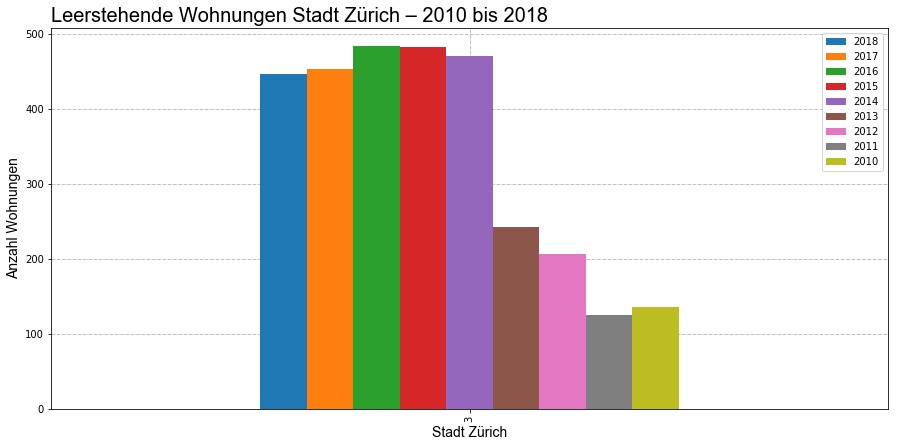

In [359]:
fig, ax = plt.subplots()    
df21.plot(kind='bar', figsize=(15,7), ax=ax)

ax.grid(which='major', linestyle='-.', linewidth='0.5', color='grey')
ax.set_axisbelow(True)

title_font = {'fontsize': 20, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_title('Leerstehende Wohnungen Stadt Zürich – 2010 bis 2018', fontdict=title_font, loc='left')

# - Achsenbeschriftungen
label_font = {'fontsize': 14, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_ylabel("Anzahl Wohnungen", fontdict=label_font)
ax.set_xlabel("Stadt Zürich", fontdict=label_font)
ax.yaxis.set_label_position('left')

------------